In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url="/content/archive (1).zip"
df=pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
df.shape

(1599, 12)

In [27]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
x=df.iloc[:,:-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
y=df.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()

In [70]:
MMS.fit_transform(df)

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
x_train.shape,x_test.shape

((1119, 11), (480, 11))

In [57]:
y_train.shape,y_test.shape

((1119,), (480,))

Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [59]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
ypred=DTC.predict(x_test)

In [61]:
ypred

array([6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 7, 5, 5, 5, 6, 5,
       5, 7, 5, 5, 5, 7, 5, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 5, 5, 6, 7, 7, 6, 7, 5, 5, 5, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 5, 7, 5, 7,
       5, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 7, 5, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5,
       5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 7, 5, 7, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [62]:
ypred_train=DTC.predict(x_train)

In [63]:
ypred_train

array([5, 7, 6, ..., 6, 6, 5])

Evaluating DTC

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
print('Testing accuracy= ',accuracy_score(y_test,ypred))
print('Training accuracy= ',accuracy_score(y_train,ypred_train))

Testing accuracy=  0.5645833333333333
Training accuracy=  0.6032171581769437


In [72]:
pd.crosstab(y_test,ypred)

col_0,5,6,7
quality,,,
3,3,0,0
4,11,3,1
5,158,43,7
6,83,97,24
7,6,23,16
8,0,3,2


In [73]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.61      0.76      0.67       208
           6       0.57      0.48      0.52       204
           7       0.32      0.36      0.34        45
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.25      0.27      0.26       480
weighted avg       0.54      0.56      0.54       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

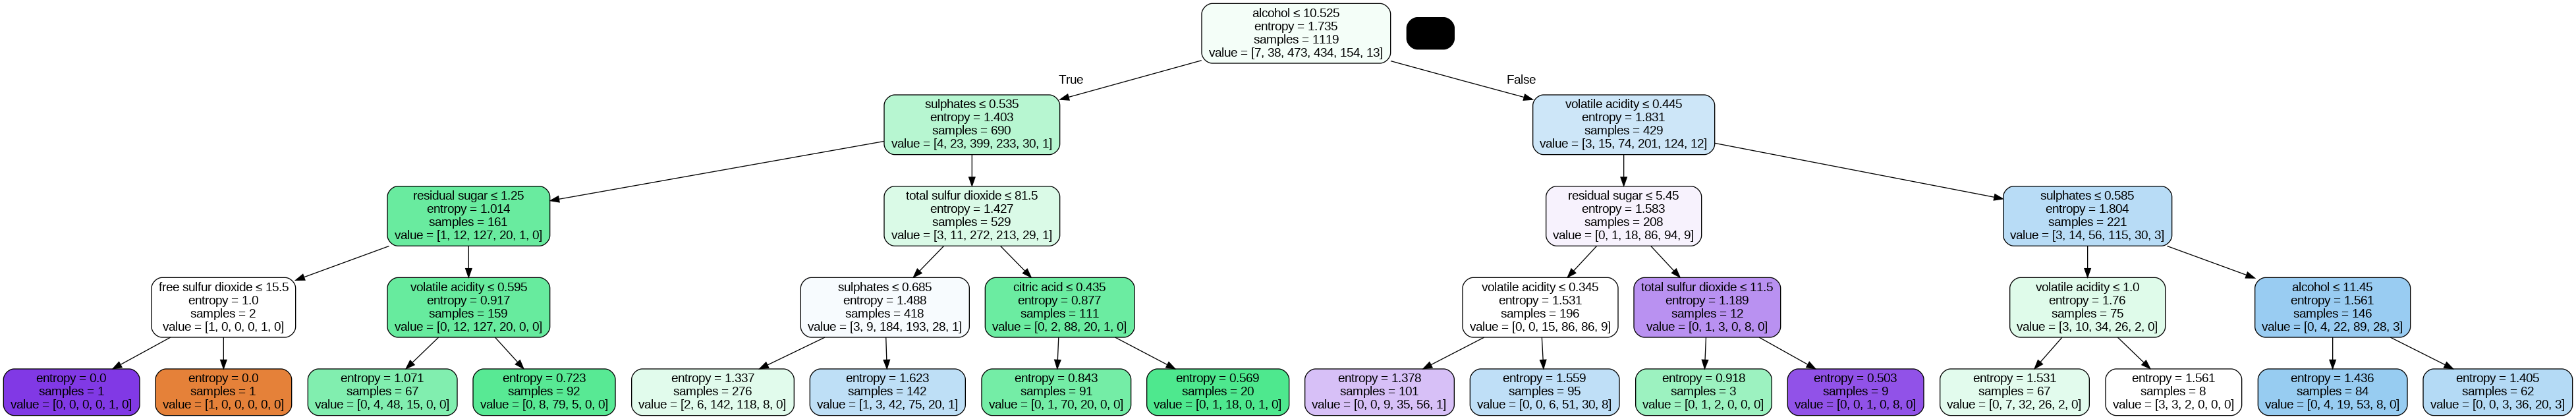

In [82]:
dot_data=StringIO()
export_graphviz(DTC,out_file=dot_data,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(f='png',prog='dot'))

In [83]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [84]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
r_ypred=RFC.predict(x_test)

In [93]:
r_ypred

array([6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 5, 6, 6,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6, 6,
       5, 7, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [94]:
r_ypred_train=RFC.predict(x_train)

In [95]:
r_ypred_train

array([5, 6, 5, ..., 6, 6, 5])

In [96]:
print('Testing accuracy= ',accuracy_score(y_test,r_ypred))

Testing accuracy=  0.6895833333333333


In [97]:
print('training accuracy= ',accuracy_score(y_train,r_ypred_train))

training accuracy=  1.0


In [98]:
pd.crosstab(y_test,r_ypred)

col_0,5,6,7,8
quality,,,,
3,1,2,0,0
4,11,4,0,0
5,160,44,4,0
6,45,142,17,0
7,2,12,29,2
8,0,2,3,0


In [99]:
print(classification_report(y_test,r_ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.73      0.77      0.75       208
           6       0.69      0.70      0.69       204
           7       0.55      0.64      0.59        45
           8       0.00      0.00      0.00         5

    accuracy                           0.69       480
   macro avg       0.33      0.35      0.34       480
weighted avg       0.66      0.69      0.67       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
